<a href="https://colab.research.google.com/github/snlynnoo/customer-segamentation-banking/blob/main/customer_segmentation_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer Segmentaion 

In [32]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn
import warnings

# Set max row and col for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 100)

# Supress warnings
warnings.filterwarnings('ignore')

In [3]:
# Set max row and col for pandas dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/bank_transactions.csv')
df.shape

(1048567, 9)

### Data Preprocessing

In [5]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
# Custom Function to generate descriptive statics
def describe_custom(df):
    desc = df.describe()
    skewness = df.skew()
    median = df.median()
    mode = df.mode()
    desc.loc['skewness'] = skewness
    desc.loc['median'] = median
    desc.loc['mode'] = mode.iloc[0]
    return desc

In [7]:
describe_custom(df).T

,count,mean,std,min,25%,50%,75%,max,skewness,median,mode
CustAccountBalance,1046198.0,115403.540056,846485.380601,0.0,4721.76,16792.18,57657.36,1.150355e+08,60.530334,16792.18,0.0
TransactionTime,1048567.0,157087.529393,51261.854022,0.0,124030.00,164226.00,200010.00,2.359590e+05,-0.836924,164226.00,193303.0
TransactionAmount (INR),1048567.0,1574.335003,6574.742978,0.0,161.00,459.03,1200.00,1.560035e+06,47.337252,459.03,100.0


In [8]:
# Check missing values
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

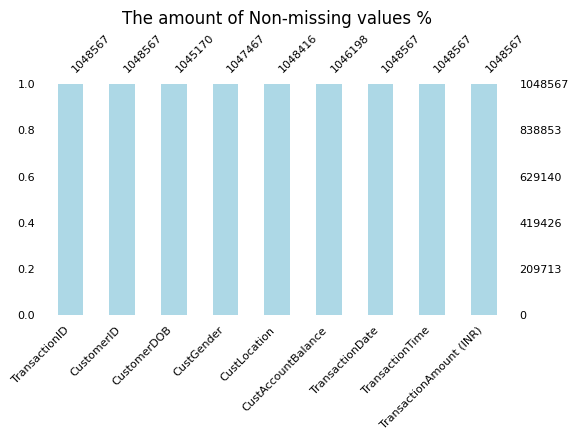

In [9]:
# Plot non-missing value %
msno.bar(df, color = "lightblue", figsize = (6,3), fontsize = 8)
plt.title("The amount of Non-missing values %", fontsize = 12)
plt.show()

⏭

In [10]:
# delete missing data
df.dropna(inplace=True)

In [11]:
df.shape

(1041614, 9)

In [12]:
#check for duplicates
df[df.duplicated() == True ].count()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

⏭

In [13]:
# convert type of columns TransactionDate,CustomerDOB from string to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [14]:
df['TransactionDate'].value_counts()

2016-07-08    27084
2016-08-13    26738
2016-04-09    26420
2016-06-08    26416
2016-03-09    26292
2016-10-09    25628
2016-08-14    25407
2016-11-09    25355
2016-08-15    24020
2016-08-21    22833
2016-02-09    22718
2016-12-08    22277
2016-01-09    22179
2016-11-08    21674
2016-09-08    21673
2016-08-09    21648
2016-10-08    21457
2016-09-09    21444
2016-08-27    21349
2016-08-20    21188
2016-05-09    21116
2016-07-09    20999
2016-08-17    20960
2016-05-08    20949
2016-08-28    20944
2016-08-08    20883
2016-02-08    20787
2016-12-09    20611
2016-04-08    20535
2016-09-13    20506
2016-03-08    20446
2016-08-16    20278
2016-01-08    20277
2016-09-14    19845
2016-09-15    19610
2016-08-31    19586
2016-06-09    19510
2016-08-18    19338
2016-08-19    18559
2016-08-22    18441
2016-08-25    18424
2016-08-24    17893
2016-08-26    17615
2016-08-30    17273
2016-08-23    17239
2016-08-29    16700
2016-09-18    14622
2016-09-26    12376
2016-09-25     8127
2016-09-27     7401


All the transactions took place in a roughly two month period from August to October

In [15]:
df['CustomerDOB'].value_counts()

1800-01-01    56292
1989-01-01      809
1990-01-01      784
1991-06-08      698
1991-01-01      665
              ...  
2051-02-12        1
2052-03-20        1
2047-09-26        1
2041-04-10        1
2044-10-24        1
Name: CustomerDOB, Length: 17233, dtype: int64

In [16]:
filtered_df = df.loc[df['CustomerDOB'].dt.year >= 2006]
filtered_df['CustomerDOB'].value_counts()

2054-12-28    214
2069-01-01    180
2071-01-06    170
2070-01-12    150
2072-01-11    140
             ... 
2061-04-29      1
2043-03-12      1
2053-07-30      1
2012-02-18      1
2044-10-24      1
Name: CustomerDOB, Length: 7603, dtype: int64

There are exceptionally high number of customers with DOB as 1800-01-01 as compared to the rest, this is probably the default value. A customer being born in 1800 would mean he/she will be 216 years old in 2016, which doesnt make sense, hence these data will be deleted.

Also, any DOB later than 2006 will be removed since in India, the legal age to have a bank account is 10yo. 

⏭

In [17]:
# Remove data for DOB = 1800-01-01 and DOB >2006
df = df.loc[~(df['CustomerDOB'] == '1800-01-01')]
df = df.loc[~(df['CustomerDOB'].dt.year >= 2006)]

In [18]:
df.shape

(901140, 9)

⏭

In [19]:
#Calculate customer age:
df['CustomerAge'] =df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year

In [20]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,24


In [21]:
df['CustomerAge'].value_counts()

26    72616
25    71185
27    69156
24    66484
28    62905
29    58606
23    53142
30    52897
31    46096
32    41105
22    36179
33    35701
34    32364
35    27369
36    25122
37    22126
21    20704
38    19605
39    16626
40    15057
20    12480
41    12293
42    10952
43     9908
19     7155
18     1936
17      688
16      269
15      142
14       98
12       75
13       69
11       30
Name: CustomerAge, dtype: int64

In [22]:
df.CustGender.value_counts()

M    651768
F    249372
Name: CustGender, dtype: int64

**Feature engineering - RFM Scores**




*   Recency: Number of days since the last purchase or order
*   Frequency: Number of transactions made
*   Monetary: Total amount spent



⏭

In [23]:
df['TransactionDate1']=df['TransactionDate'] # ==> to calculate the minimum (first transaction)
df['TransactionDate2']=df['TransactionDate'] # ==> to calculate the maximum (last transaction)

⏭

In [24]:
RFM_df = df.groupby("CustomerID").agg({
                                        "TransactionID" : "count",
                                        "CustGender" : "first",
                                        "CustLocation":"first",
                                        "CustAccountBalance"  : "mean",
                                        "TransactionAmount (INR)" : "sum",
                                        "CustomerAge" : "median",
                                        "TransactionDate2":"max",
                                        "TransactionDate1":"min",
                                        "TransactionDate":"median"
                        })


⏭

In [25]:
RFM_df = RFM_df.reset_index()

In [26]:
#confirm customer ID is unique
RFM_df.CustomerID.value_counts()

C1010011    1
C6412358    1
C6412331    1
C6412339    1
C6412341    1
           ..
C3710944    1
C3710946    1
C3710948    1
C3710951    1
C9099956    1
Name: CustomerID, Length: 777356, dtype: int64

⏭

In [27]:
RFM_df['Recency']=RFM_df['TransactionDate2']-RFM_df['TransactionDate1']

In [28]:
RFM_df.Recency.value_counts()

0 days      669064
1 days        2677
31 days       2033
30 days       1994
61 days       1726
             ...  
287 days        15
58 days         12
265 days        10
266 days         7
206 days         5
Name: Recency, Length: 252, dtype: int64

⏭

In [29]:
# Rename Columns
RFM_df.rename(columns={"TransactionID":"Frequency"},inplace=True)
RFM_df.rename(columns={"TransactionAmount (INR)":"Monetary"},inplace=True)

In [30]:
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777356 entries, 0 to 777355
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   CustomerID          777356 non-null  object         
 1   Frequency           777356 non-null  int64          
 2   CustGender          777356 non-null  object         
 3   CustLocation        777356 non-null  object         
 4   CustAccountBalance  777356 non-null  float64        
 5   Monetary            777356 non-null  float64        
 6   CustomerAge         777356 non-null  float64        
 7   TransactionDate2    777356 non-null  datetime64[ns] 
 8   TransactionDate1    777356 non-null  datetime64[ns] 
 9   TransactionDate     777356 non-null  datetime64[ns] 
 10  Recency             777356 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), float64(3), int64(1), object(3), timedelta64[ns](1)
memory usage: 65.2+ MB


In [33]:
#@title Exploratory Data Analysis
EDA_df = RFM_df
EDA_df.drop(columns=["CustomerID","TransactionDate2","TransactionDate1","TransactionDate"],inplace=True)

In [43]:
EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777356 entries, 0 to 777355
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   Frequency           777356 non-null  int64          
 1   CustGender          777356 non-null  object         
 2   CustLocation        777356 non-null  object         
 3   CustAccountBalance  777356 non-null  float64        
 4   Monetary            777356 non-null  float64        
 5   CustomerAge         777356 non-null  float64        
 6   Recency             777356 non-null  timedelta64[ns]
dtypes: float64(3), int64(1), object(2), timedelta64[ns](1)
memory usage: 41.5+ MB


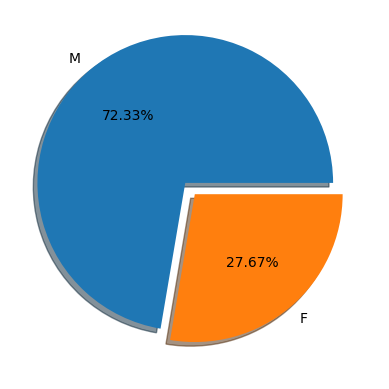

In [35]:
# Univariate - CustGender
labels = df.CustGender.value_counts().keys()
values = df.CustGender.value_counts().values
explode = (0.1,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%');

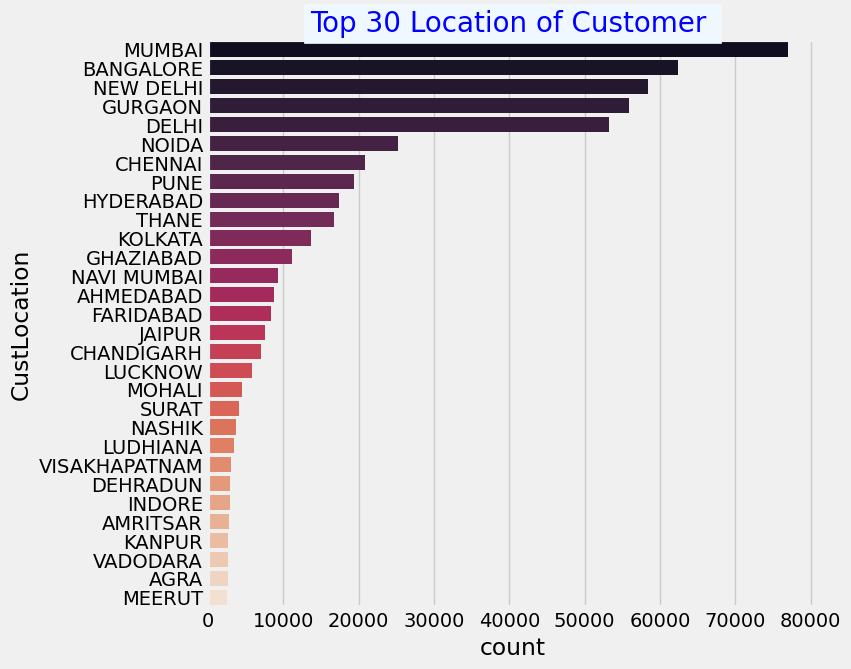

In [37]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(7,7))
chart=sns.countplot(y='CustLocation',data=EDA_df,palette='rocket', order = EDA_df['CustLocation'].value_counts()[:30].index)
plt.title("Top 30 Location of Customer ",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='blue');

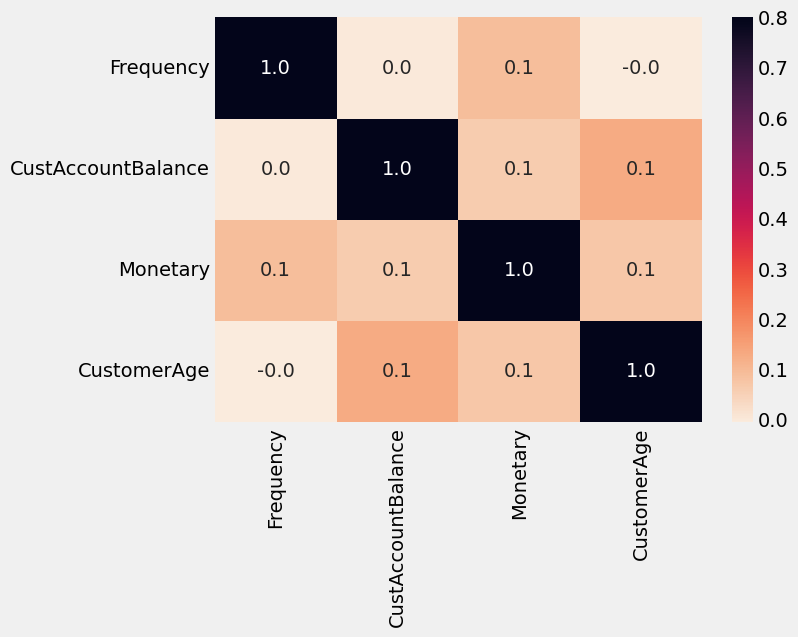

In [38]:
plt.figure(figsize=(7,5))
correlation=EDA_df.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='rocket_r',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True);

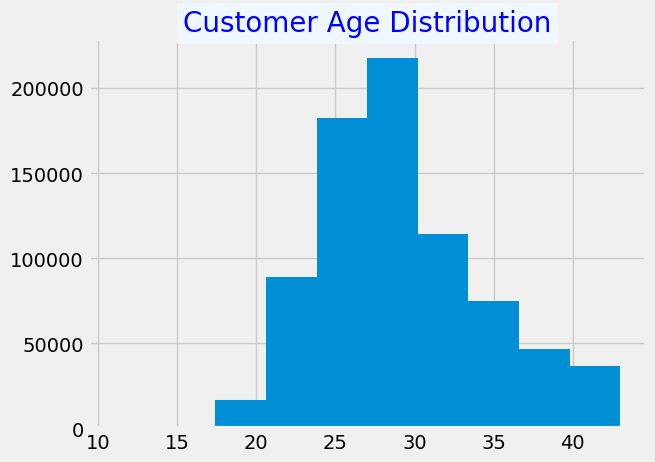

In [40]:
plt.hist(EDA_df['CustomerAge'])
plt.title("Customer Age Distribution",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='blue');

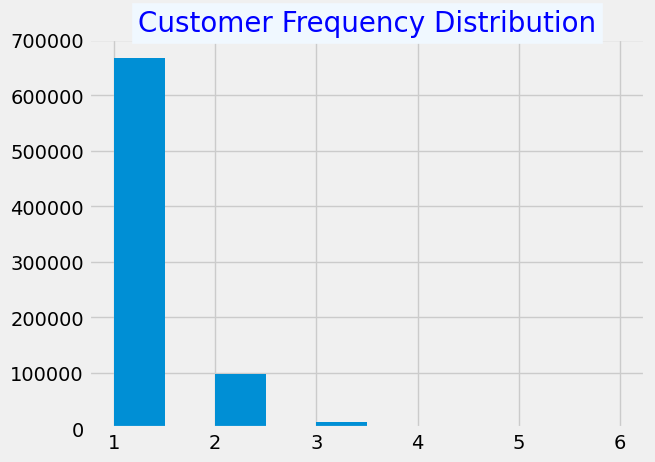

In [41]:
plt.hist(EDA_df['Frequency'])
plt.title("Customer Frequency Distribution",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='blue');

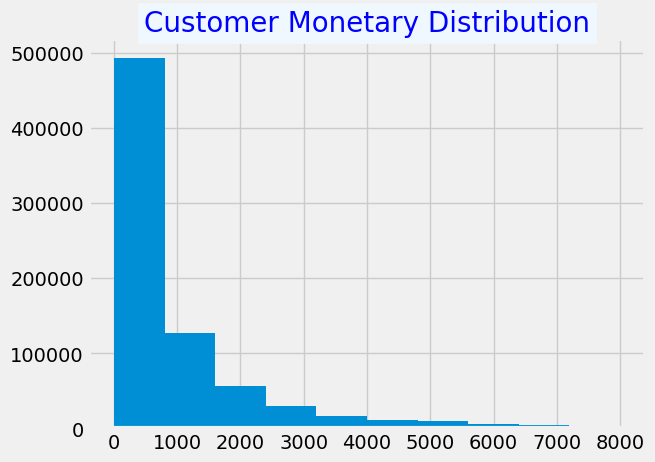

In [55]:
plt.hist(EDA_df['Monetary'],range=[0, 8000])
plt.title("Customer Monetary Distribution",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='blue');

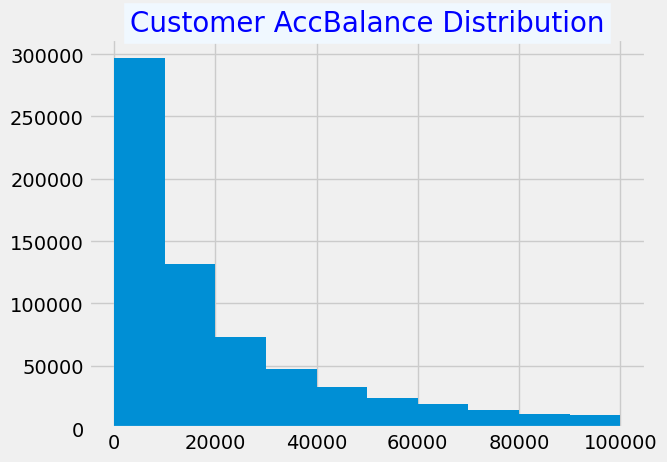

In [60]:
plt.hist(EDA_df['CustAccountBalance'],range=[0, 100000])
plt.title("Customer AccBalance Distribution",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='blue');

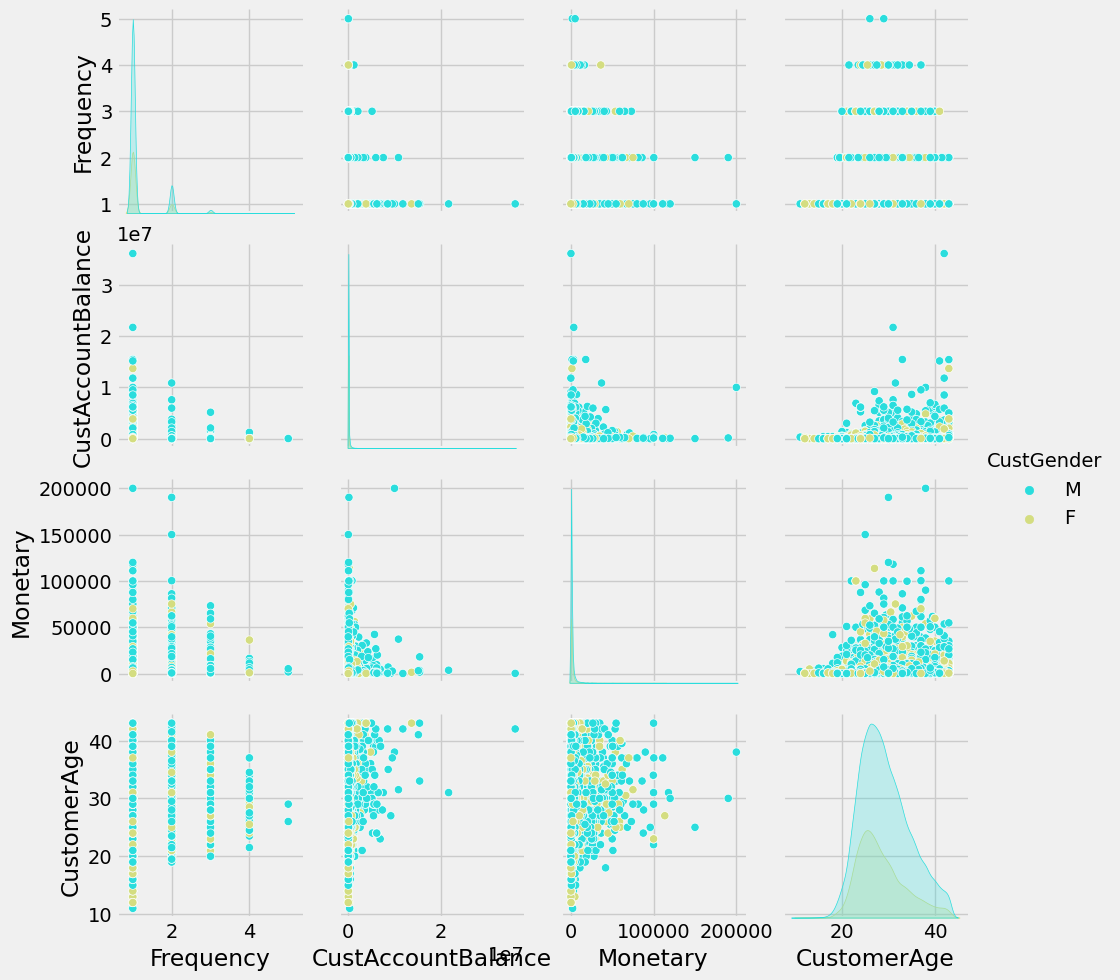

In [61]:
sns.pairplot(EDA_df.sample(n=50000),hue='CustGender',palette='rainbow')

In [45]:
EDA_df.head()

,Frequency,CustGender,CustLocation,CustAccountBalance,Monetary,CustomerAge,Recency
0,2,F,NOIDA,76340.635,5106.0,28.5,18 days
1,1,M,MUMBAI,24204.490,1499.0,22.0,0 days
2,2,F,MUMBAI,100112.950,1455.0,28.0,182 days
3,1,F,CHAMPARAN,496.180,30.0,26.0,0 days
4,1,F,DELHI,296828.370,557.0,28.0,0 days


In [ ]:
EDA_df.CustLocation.value_counts()

### Sampling

In [ ]:
# Sample 0.5 % of the original dataset
df_sub = EDA_df.sample(frac = 0.05, random_state = 42)
df_sub.shape
df_sub.to_csv('/content/drive/MyDrive/Colab notebooks/Crystal_CP_Segmentation/bank_transactions_sub.csv', index = False)